# LSTM FOR STOCK PRICE PREDICTION-(BULLISH MARKET CYCLE)
This script uses LSTM to predict stock price in a Bullish Market Cycle

In [1]:
pip install scikeras

In [2]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold



In [3]:
# Fetch data from Yahoo Finance
data = yf.download('^FTSE', start='2009-01-01', end='2015-06-30')


[*********************100%***********************]  1 of 1 completed


In [4]:
# Drop NA values
data.dropna(inplace=True)


In [5]:
# Specify the target variable
target = 'Close'

In [6]:
# Split data into X and y
X = data.drop(target, axis=1)
y = data[[target]]

In [7]:
# Initialize a scaler and fit it to the features
scaler_X = MinMaxScaler(feature_range=(0, 1))
X = scaler_X.fit_transform(X)

In [8]:
# Initialize a scaler and fit it to the target
scaler_y = MinMaxScaler(feature_range=(0, 1))
y = scaler_y.fit_transform(y)

In [9]:
# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

In [10]:
# Split the dataset into training and testing sets
train_size = int(0.80 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM MODEL DEVELOPMENT 

In [11]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)


Epoch 1/50
1309/1309 - 4s - loss: 0.0063 - 4s/epoch - 3ms/step
Epoch 2/50
1309/1309 - 2s - loss: 1.1494e-04 - 2s/epoch - 1ms/step
Epoch 3/50
1309/1309 - 2s - loss: 9.1197e-05 - 2s/epoch - 1ms/step
Epoch 4/50
1309/1309 - 2s - loss: 8.7351e-05 - 2s/epoch - 1ms/step
Epoch 5/50
1309/1309 - 2s - loss: 7.7464e-05 - 2s/epoch - 1ms/step
Epoch 6/50
1309/1309 - 2s - loss: 7.4342e-05 - 2s/epoch - 1ms/step
Epoch 7/50
1309/1309 - 2s - loss: 5.2681e-05 - 2s/epoch - 1ms/step
Epoch 8/50
1309/1309 - 2s - loss: 4.8019e-05 - 2s/epoch - 1ms/step
Epoch 9/50
1309/1309 - 2s - loss: 4.0736e-05 - 2s/epoch - 1ms/step
Epoch 10/50
1309/1309 - 2s - loss: 3.5333e-05 - 2s/epoch - 1ms/step
Epoch 11/50
1309/1309 - 2s - loss: 3.0247e-05 - 2s/epoch - 1ms/step
Epoch 12/50
1309/1309 - 2s - loss: 2.2898e-05 - 2s/epoch - 1ms/step
Epoch 13/50
1309/1309 - 2s - loss: 2.1910e-05 - 2s/epoch - 1ms/step
Epoch 14/50
1309/1309 - 2s - loss: 1.7365e-05 - 2s/epoch - 1ms/step
Epoch 15/50
1309/1309 - 2s - loss: 1.3862e-05 - 2s/epoch - 1m

In [13]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 806us/step


In [14]:
# Invert predictions back to normal values
train_predict = scaler_y.inverse_transform(train_predict)
y_train = scaler_y.inverse_transform(y_train)
test_predict = scaler_y.inverse_transform(test_predict)
y_test = scaler_y.inverse_transform(y_test)

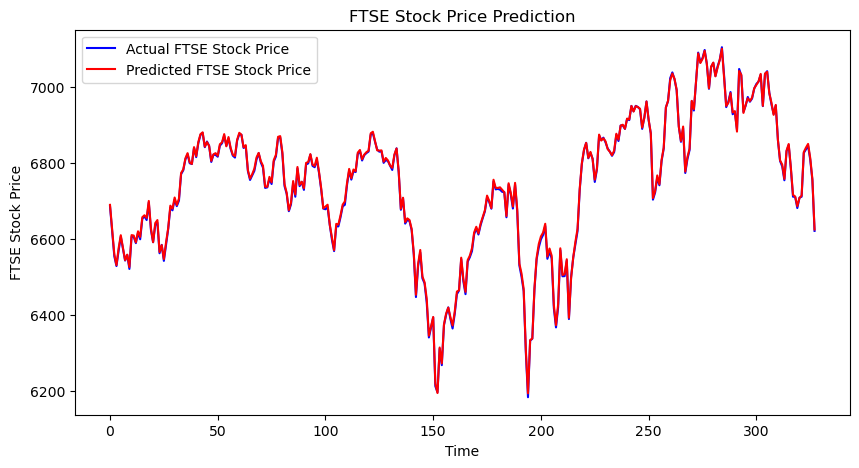

In [15]:
# Plot the actual and predicted prices
plt.figure(figsize=(10,5))
plt.plot(y_test, color='blue', label='Actual FTSE Stock Price')
plt.plot(test_predict, color='red', label='Predicted FTSE Stock Price')
plt.title('FTSE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('FTSE Stock Price')
plt.legend()
plt.show()

# EVALUATION METRICS
This metrics are used to evaluate the performance of the models compared. Cross validation is specifically included for more robust measure in comparing the various models performance.

In [16]:
# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 21.283684291577316
Test MSE: 15.018598251953357


In [17]:
# Calculate root mean squared error
train_score = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Train Score: {train_score} RMSE')
test_score = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Test Score: {test_score} RMSE')

Train Score: 4.613424356329831 RMSE
Test Score: 3.875383626423758 RMSE


In [18]:
# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

train_mape = mean_absolute_percentage_error(y_train, train_predict)
test_mape = mean_absolute_percentage_error(y_test, test_predict)
print(f'Train MAPE: {train_mape}')
print(f'Test MAPE: {test_mape}')



Train MAPE: 0.07230504807939901
Test MAPE: 0.04987341300269848


In [19]:
# Cross Validation
def create_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

estimator = KerasRegressor(build_fn=create_model, epochs=50, batch_size=1, verbose=0)
kfold = KFold(n_splits=5)
results = cross_val_score(estimator, X, y.ravel(), cv=kfold)  # using ravel() to reshape y for compatibility
print(f"Cross Validation Mean: {results.mean()}, Standard Deviation: {results.std()}")

C:\Users\ekefe\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ekefe\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ekefe\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ekefe\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\ekefe\anaconda3\Lib\site-pa

Cross Validation Mean: 0.9987905931526487, Standard Deviation: 0.001663171012763817
